# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Quinasa Rama
- Email: quinasarama@gmail.com
- Id Dicoding: 1sleep23

## Persiapan

### Menyiapkan library yang dibutuhkan

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Menyiapkan data yang akan diguankan

In [94]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv",
    sep=";"
)
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Pada persiapan data, digunakan separator ; karena data mentah menggunakan ; sebagai pemisah.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Ada beberapa kolom yang tidak sesuai tipe datanya, sehingga perlu diubah.

In [96]:
# Daftar kolom yang perlu diubah ke tipe kategori
category_columns = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status'
]

# Mengonversi setiap kolom dalam category_columns menjadi tipe kategori
for col in category_columns:
    if col in df.columns:  # Memastikan kolom ada dalam dataset
        df[col] = df[col].astype('category')

# Memverifikasi perubahan tipe data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

## Data Understanding

In [97]:
df.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [98]:
# Menghitung distribusi nilai untuk variabel target "Status" dan beberapa kolom kategorikal utama
status_distribution = df["Status"].value_counts()
marital_status_distribution = df["Marital_status"].value_counts()
application_mode_distribution = df["Application_mode"].value_counts()
course_distribution = df["Course"].value_counts()

status_distribution, marital_status_distribution, application_mode_distribution, course_distribution

(Status
 Graduate    2209
 Dropout     1421
 Enrolled     794
 Name: count, dtype: int64,
 Marital_status
 1    3919
 2     379
 4      91
 5      25
 6       6
 3       4
 Name: count, dtype: int64,
 Application_mode
 1     1708
 17     872
 39     785
 43     312
 44     213
 7      139
 18     124
 42      77
 51      59
 16      38
 53      35
 15      30
 5       16
 10      10
 2        3
 26       1
 27       1
 57       1
 Name: count, dtype: int64,
 Course
 9500    766
 9147    380
 9238    355
 9085    337
 9773    331
 9670    268
 9991    268
 9254    252
 9070    226
 171     215
 8014    215
 9003    210
 9853    192
 9119    170
 9130    141
 9556     86
 33       12
 Name: count, dtype: int64)

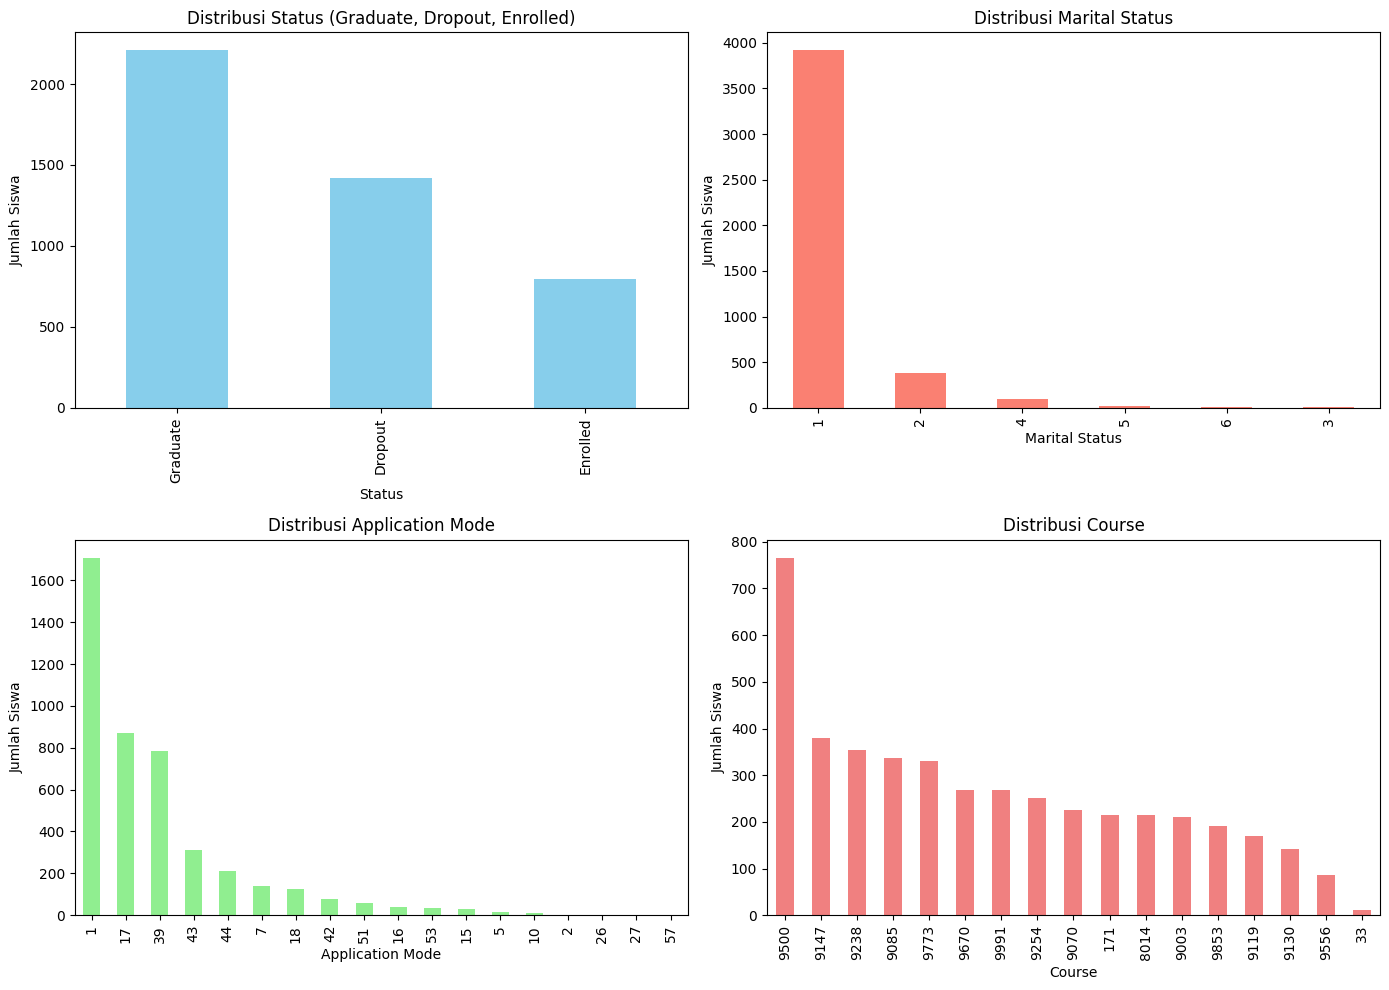

In [99]:
# Membuat visualisasi untuk distribusi variabel target (Status), Marital Status, Application Mode, dan Course
plt.figure(figsize=(14, 10))

# Distribusi Status (Graduate, Dropout, Enrolled)
plt.subplot(2, 2, 1)
df["Status"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Status (Graduate, Dropout, Enrolled)")
plt.xlabel("Status")
plt.ylabel("Jumlah Siswa")

# Distribusi Marital Status
plt.subplot(2, 2, 2)
df["Marital_status"].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribusi Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah Siswa")

# Distribusi Application Mode
plt.subplot(2, 2, 3)
df["Application_mode"].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Distribusi Application Mode")
plt.xlabel("Application Mode")
plt.ylabel("Jumlah Siswa")

# Distribusi Course
plt.subplot(2, 2, 4)
df["Course"].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Distribusi Course")
plt.xlabel("Course")
plt.ylabel("Jumlah Siswa")

plt.tight_layout()
plt.show()

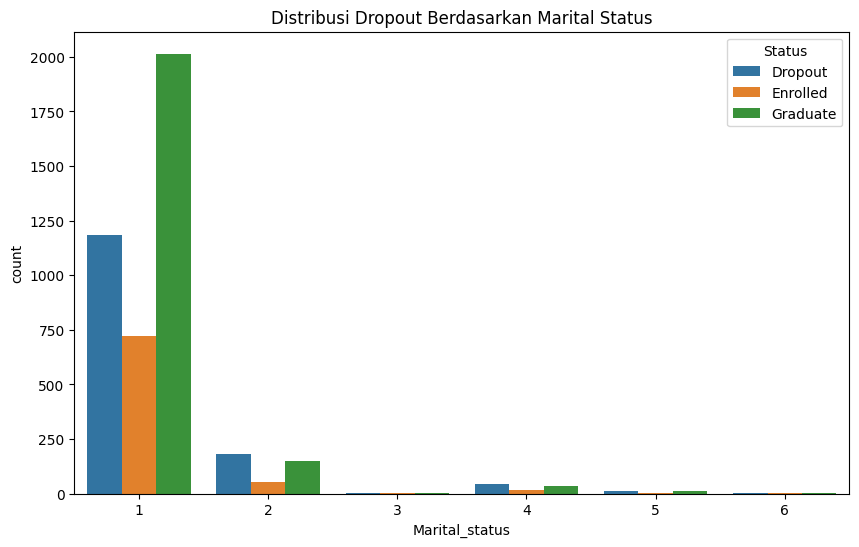

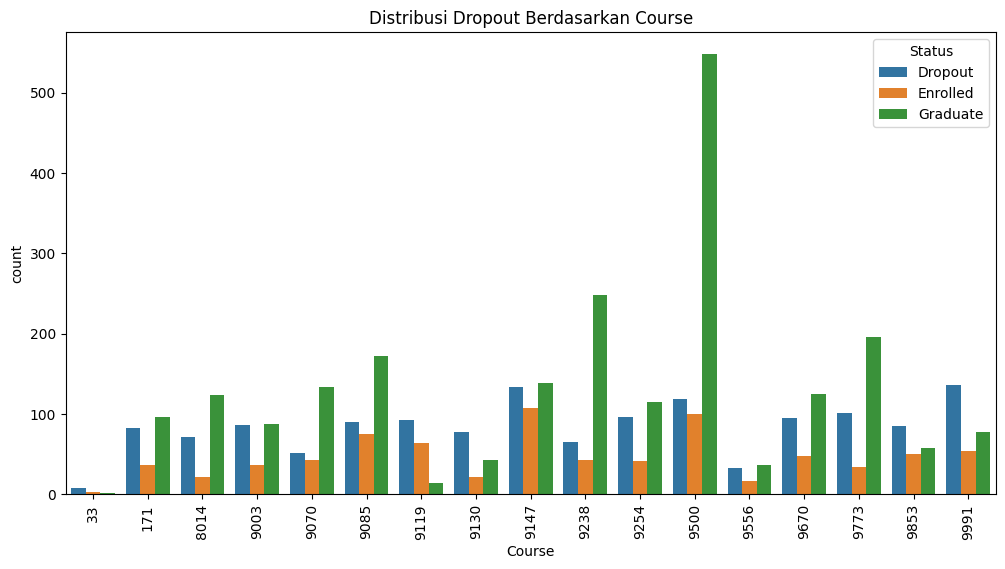

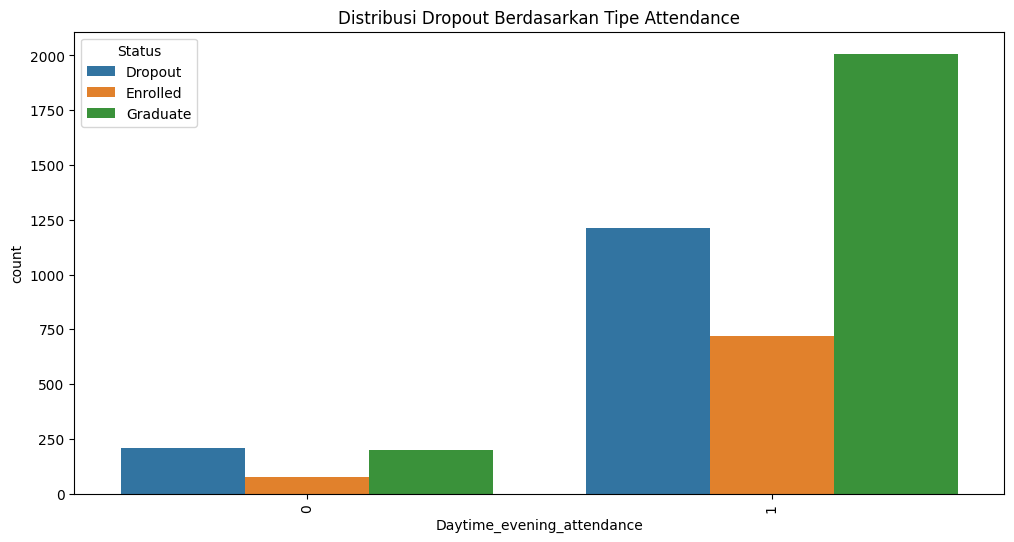

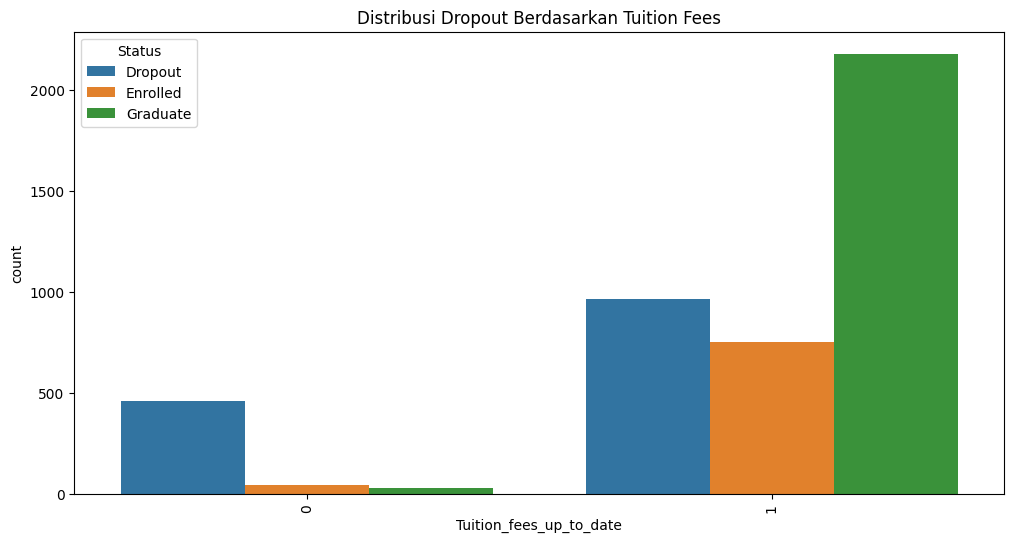

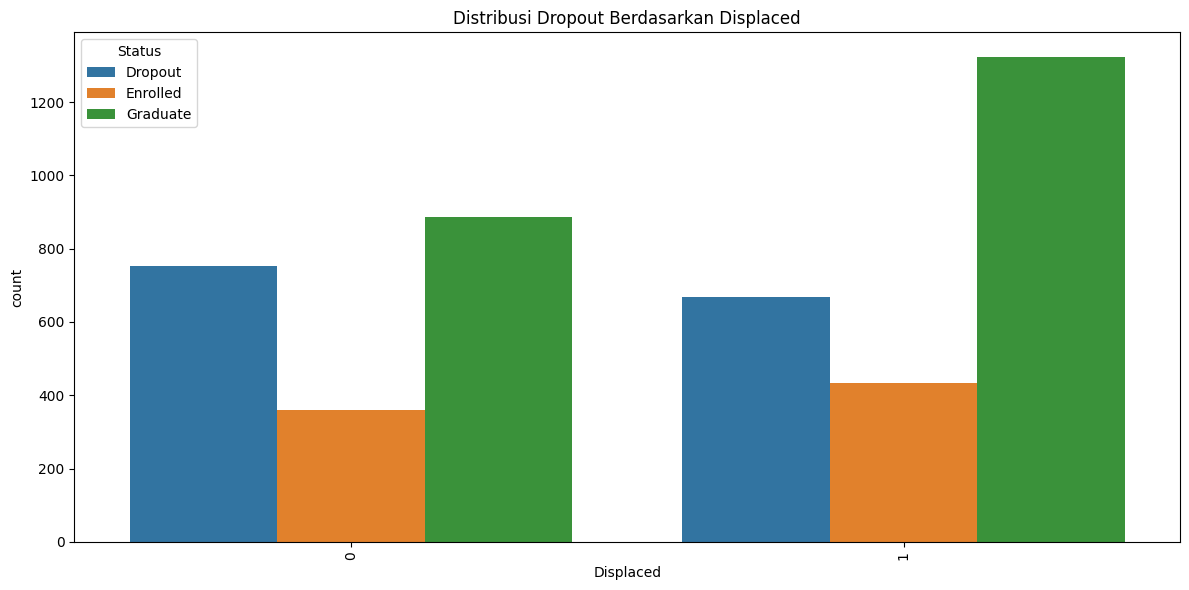

In [100]:
# Plot distribusi status dropout berdasarkan Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Marital_status", hue="Status", data=df)
plt.title("Distribusi Dropout Berdasarkan Marital Status")

# Plot distribusi status dropout berdasarkan Course
plt.figure(figsize=(12, 6))
sns.countplot(x="Course", hue="Status", data=df)
plt.title("Distribusi Dropout Berdasarkan Course")
plt.xticks(rotation=90)

# Plot distribusi status dropout berdasarkan Course
plt.figure(figsize=(12, 6))
sns.countplot(x="Daytime_evening_attendance", hue="Status", data=df)
plt.title("Distribusi Dropout Berdasarkan Tipe Attendance")
plt.xticks(rotation=90)

# Plot distribusi status dropout berdasarkan Course
plt.figure(figsize=(12, 6))
sns.countplot(x="Tuition_fees_up_to_date", hue="Status", data=df)
plt.title("Distribusi Dropout Berdasarkan Tuition Fees")
plt.xticks(rotation=90)

# Plot distribusi status dropout berdasarkan Course
plt.figure(figsize=(12, 6))
sns.countplot(x="Displaced", hue="Status", data=df)
plt.title("Distribusi Dropout Berdasarkan Displaced")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Berdasarkan beberapa feature kategorik, terlihat bahwa tingkat dropout tersebar di semua fitur. Tidak ditemukan adanya kecenderungan dropout di salah satu feature kategorik.

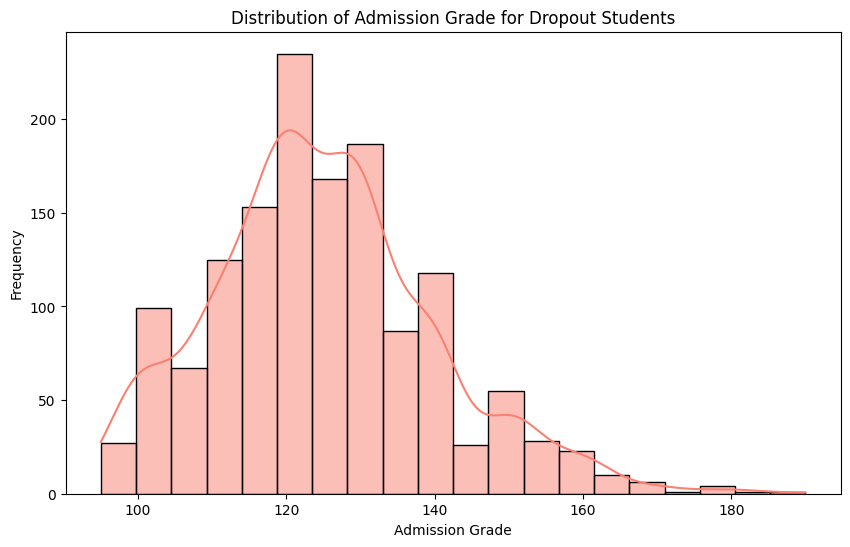

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk fokus pada siswa dengan status 'Dropout'
dropout_data = df[df['Status'] == 'Dropout']

# Visualisasi distribusi Admission Grade untuk siswa yang Dropout
plt.figure(figsize=(10, 6))
sns.histplot(dropout_data['Admission_grade'], kde=True, bins=20, color="salmon")
plt.title("Distribution of Admission Grade for Dropout Students")
plt.xlabel("Admission Grade")
plt.ylabel("Frequency")
plt.show()


1. Admission Grade yang Rendah (<120): Ada kecenderungan bahwa siswa dengan nilai admission yang rendah (misalnya, 100 hingga 120) memiliki risiko dropout yang lebih tinggi. Hal ini bisa jadi karena mereka kurang siap secara akademik ketika masuk, sehingga mereka lebih sulit bertahan di institusi pendidikan.
2. Admission Grade Menengah (120-140): Masih ada sejumlah siswa dropout dalam rentang ini, tetapi frekuensinya menurun. Ini mungkin mencerminkan siswa yang memiliki kesiapan akademik sedang tetapi mungkin menghadapi tantangan lainnya yang menyebabkan mereka dropout.
3. Admission Grade Tinggi (>140): Setelah nilai 140, frekuensi dropout berkurang secara signifikan, menunjukkan bahwa siswa dengan nilai admission yang tinggi cenderung lebih siap secara akademik dan lebih mungkin untuk menyelesaikan studi mereka.

## Data Preparation / Preprocessing

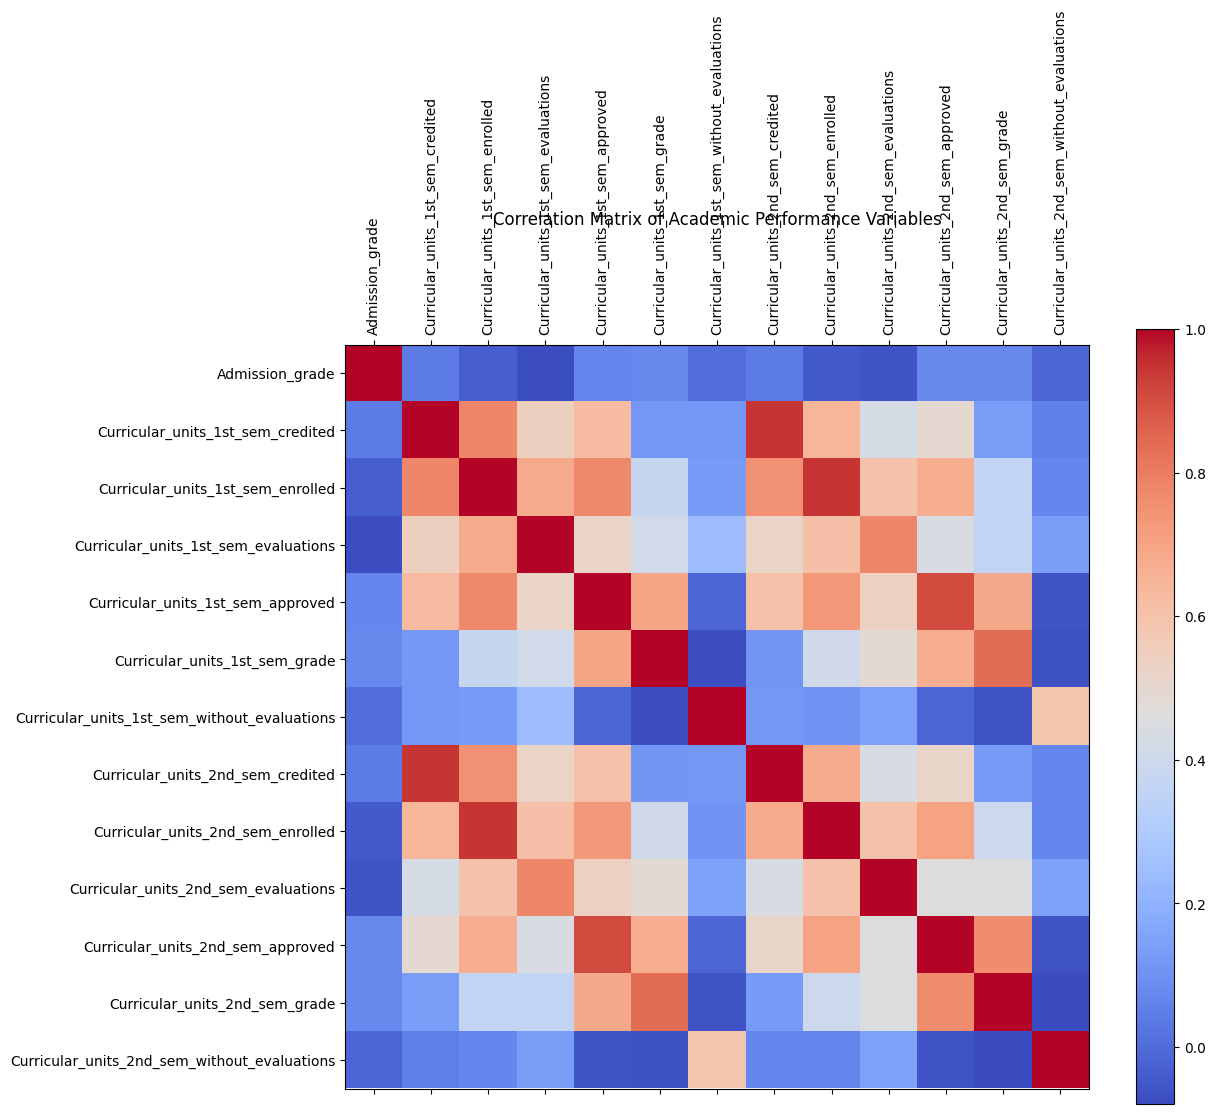

In [101]:
academic_columns = [
    "Admission_grade", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations"
]

# Menghitung matriks korelasi
correlation_matrix = df[academic_columns].astype(float).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.title("Correlation Matrix of Academic Performance Variables", y=1.15)

# Menampilkan nama kolom untuk heatmap
plt.xticks(range(len(academic_columns)), academic_columns, rotation=90)
plt.yticks(range(len(academic_columns)), academic_columns)

plt.show()

Dari correlation matrix, kita dapat melihat bahwa:
1. Curricular_units_1st_sem_approved dan Curricular_units_1st_sem_grade menunjukkan korelasi positif yang kuat. Hal ini mengimplikasikan semakin banyak mata kuliah yang disetujui di semester pertama, semakin tinggi pula nilai rata-rata siswa di semester tersebut.
2. Curricular_units_2nd_sem_approved dan Curricular_units_2nd_sem_grade juga menunjukkan pola serupa. Korelasi ini menunjukkan bahwa siswa yang berhasil menyelesaikan lebih banyak mata kuliah di semester kedua cenderung memiliki nilai rata-rata yang lebih tinggi.
3. Curricular_units_1st_sem_enrolled dan Curricular_units_1st_sem_evaluations memiliki korelasi tinggi, yang berarti siswa yang mengambil lebih banyak mata kuliah cenderung harus mengikuti lebih banyak evaluasi.
4. Admission_grade memiliki korelasi rendah dengan sebagian besar variabel lainnya, yang menunjukkan bahwa nilai masuk mungkin tidak terlalu berkaitan dengan variabel performa di semester tertentu. Hal ini bisa menjadi indikasi bahwa nilai masuk siswa tidak selalu mencerminkan performa mereka selama studi di institusi.
5. Curricular_units_1st_sem_without_evaluations dan Curricular_units_2nd_sem_without_evaluations mungkin dapat menjadi indikator siswa yang mengalami kesulitan dalam mengevaluasi mata kuliah tertentu atau kurang berpartisipasi. Korelasi yang rendah dengan variabel lain menunjukkan bahwa mata kuliah tanpa evaluasi mungkin tidak terlalu memengaruhi performa akademik secara keseluruhan, namun bisa menjadi penanda risiko dropout.


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memilih fitur utama berdasarkan korelasi dan deskripsi kolom pada README
selected_features = [
    "Admission_grade", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade"
]
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])
# Menyiapkan fitur X dan target y
X = df[selected_features].astype(float)
y = df["Status"].apply(lambda x: 1 if x == "Dropout" else 0)  # Mengubah target menjadi biner: Dropout (1), selainnya (0)
# Membagi data menjadi set pelatihan dan pengujian (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((3539, 10),
 (885, 10),
 Status
 0    2434
 1    1105
 Name: count, dtype: int64,
 Status
 0    569
 1    316
 Name: count, dtype: int64)

## Modeling

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Melatih model Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred_log_reg = log_reg_model.predict(X_test)

# Menghitung akurasi dan metrik evaluasi lainnya
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)

accuracy_log_reg, classification_report_log_reg

(0.831638418079096,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.88       569\n           1       0.86      0.64      0.73       316\n\n    accuracy                           0.83       885\n   macro avg       0.84      0.79      0.80       885\nweighted avg       0.83      0.83      0.82       885\n')

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred_rf = rf_model.predict(X_test)

# Menghitung akurasi dan metrik evaluasi lainnya untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, classification_report_rf

(0.8225988700564971,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.92      0.87       569\n           1       0.82      0.64      0.72       316\n\n    accuracy                           0.82       885\n   macro avg       0.82      0.78      0.80       885\nweighted avg       0.82      0.82      0.82       885\n')

In [105]:
# Mengambil fitur penting (feature importance) dari model Random Forest
importances = rf_model.feature_importances_
features = X.columns  # Daftar fitur dalam data pelatihan

# Menggabungkan fitur dan nilai pentingnya dalam bentuk DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Menampilkan beberapa fitur teratas berdasarkan pentingnya
print(feature_importance_df.head(10))

                                Feature  Importance
9        Curricular_units_2nd_sem_grade    0.195768
8     Curricular_units_2nd_sem_approved    0.189414
0                       Admission_grade    0.146472
4     Curricular_units_1st_sem_approved    0.128197
5        Curricular_units_1st_sem_grade    0.114855
7  Curricular_units_2nd_sem_evaluations    0.065209
3  Curricular_units_1st_sem_evaluations    0.063842
2     Curricular_units_1st_sem_enrolled    0.040341
6     Curricular_units_2nd_sem_enrolled    0.037036
1     Curricular_units_1st_sem_credited    0.018866


**Curricular_units_2nd_sem_grade (0.1958) dan Curricular_units_2nd_sem_approved (0.1894)**

Fitur ini memiliki importance tertinggi dalam model, yang menunjukkan bahwa nilai rata-rata dan jumlah mata kuliah yang disetujui di semester kedua merupakan indikator kuat apakah siswa akan dropout atau berhasil.

**Admission_grade (0.1465)**
Nilai masuk juga merupakan faktor penting. Ini menunjukkan bahwa siswa yang masuk dengan nilai lebih rendah mungkin berisiko lebih tinggi untuk dropout, kemungkinan karena mereka kurang siap secara akademik.

**Curricular_units_1st_sem_approved (0.1282) dan Curricular_units_1st_sem_grade (0.1149)**

Seperti pada semester kedua, performa akademik di semester pertama juga memiliki dampak signifikan pada prediksi dropout. Jumlah mata kuliah yang disetujui dan nilai rata-rata di semester pertama sangat memengaruhi kesuksesan siswa ke depannya.

## Evaluation

In [107]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [109]:
pip freeze > requirements.txt